
# ABCHiring
## Company Introduction:
Your client for this project is ABCHiring.

The organization offers a hiring assessment platform across various platforms as a cloud service.
Their clients are organizations established in multiple sectors.
Their product involves an automated assessment program that is used by these organizations.
The SaaS organization finds a lot of clients through marketing their products over social media websites, blogs, and news articles.
As a result, they spend a chunk of their revenue on various marketing initiatives - digital marketing, media outreach, search engine optimization, and more.

Current Scenario
The company is targeting a highly qualified set of customers to buy your product, the organization reaps multiple benefits, such as enhanced revenue generation, higher deal closure rates, and an increase in profit margins.

# Problem Statement : 
### The current process suffers from the following problems:

One issue is that the company has been facing the challenge of reducing its yearly marketing spends.
The company wants to figure out, if there’s a way to target a highly qualified set of customers to buy your product, the organization reaps multiple benefits, such as enhanced revenue generation, higher deal closure rates, and an increase in profit margins.

The marketing department has hired you as a data science consultant. They want to supplement their campaigns with a more proactive approach.

Your Role
You are given datasets of marketing waste and their probability percentage.
Your task is to build a regression model using the datasets.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables<br>
<b>Deliverable: Predict the probability percentage of a marketing lead.</b><br>
Machine Learning Task: <b>Regression</b><br>
Target Variable: <b>Success_probability</b><br>

Evaluation Metric
    The model evaluation will be based on the <b>RMSE</b> score.


# DataSet Description

<table>	<th>	Column Name	</th>	<th>	Description	</th>
<tr>	<td>	Deal_title	</td>	<td>	Represents a unique title for each deal	</td>	</tr>
<tr>	<td>	Lead_name	</td>	<td>	Represents the name of a lead	</td>	</tr>
<tr>	<td>	Industry	</td>	<td>	Represents the industry that a lead belongs to	</td>	</tr>
<tr>	<td>	Deal_value	</td>	<td>	Represents the value of a deal between a lead and your company (in Dollars)	</td>	</tr>
<tr>	<td>	Weighted_amount	</td>	<td>	Represents a value that is estimated revenue times a probability.	</td>	</tr>
<tr>	<td>	Date_of_creation	</td>	<td>	Represents the date when a deal's pipeline was created	</td>	</tr>
<tr>	<td>	Pitch	</td>	<td>	Represents the different types of products that your company offers to a lead	</td>	</tr>
<tr>	<td>	Contact_no	</td>	<td>	Represents the contact details of a lead (masked)	</td>	</tr>
<tr>	<td>	Lead_revenue	</td>	<td>	Represents the lead company's revenue (in Dollars)	</td>	</tr>
<tr>	<td>	Fund_category	</td>	<td>	Represents the type of funding that a lead possesses	</td>	</tr>
<tr>	<td>	Geography	</td>	<td>	Represents the geographical location of a lead (country)	</td>	</tr>
<tr>	<td>	Location	</td>	<td>	Represents the geographical location of a lead (state or city)	</td>	</tr>
<tr>	<td>	POC_name	</td>	<td>	Represents the lead's point of contact's name	</td>	</tr>
<tr>	<td>	Designation	</td>	<td>	Represents the lead POC's designation	</td>	</tr>
<tr>	<td>	Lead_POC_email	</td>	<td>	Represents the lead POC's email address	</td>	</tr>
<tr>	<td>	Hiring_candidate_role	</td>	<td>	Represents the job role that a lead wants to hire	</td>	</tr>
<tr>	<td>	Lead_source	</td>	<td>	Represents the source from which the lead is generated	</td>	</tr>
<tr>	<td>	Level_of_meeting	</td>	<td>	Represents the level of a meeting with the lead.	</td>	</tr>
<tr>	<td>	Last_lead_update	</td>	<td>	Represents the communication update between a lead and your company	</td>	</tr>
<tr>	<td>	Internal_POC	</td>	<td>	Represents the name of the employee who has generated the lead	</td>	</tr>
<tr>	<td>	Resource	</td>	<td>	Represents whether your company has enough resources to satisfy a lead's requirements	</td>	</tr>
<tr>	<td>	Internal_rating	</td>	<td>	Represents a rating (1-5) given to a lead	</td>	</tr>
<tr>	<td>	Success_probability	</td>	<td>	Represents the probability that a lead will buy a product or onboard	</td>	</tr>
</table>

In [4]:
# Importing Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import dtale


from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [5]:
train_data = pd.read_csv('train_data.csv')
train_data.shape

(5605, 23)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             5605 non-null   object 
 1   Lead_name              5605 non-null   object 
 2   Industry               5604 non-null   object 
 3   Deal_value             5565 non-null   object 
 4   Weighted_amount        5182 non-null   object 
 5   Date_of_creation       5605 non-null   object 
 6   Pitch                  5605 non-null   object 
 7   Contact_no             5605 non-null   object 
 8   Lead_revenue           5605 non-null   object 
 9   Fund_category          5605 non-null   object 
 10  Geography              4815 non-null   object 
 11  Location               5596 non-null   object 
 12  POC_name               5599 non-null   object 
 13  Designation            5605 non-null   object 
 14  Lead_POC_email         5605 non-null   object 
 15  Hiri

In [7]:
train_data.describe()

,Internal_rating,Success_probability
count,5605.000000,5605.000000
mean,3.014630,64.743536
std,1.413885,17.919659
min,1.000000,-5.000000
25%,2.000000,60.500000
50%,3.000000,65.200000
75%,4.000000,69.600000
max,5.000000,107.340000


In [8]:
train_data.isnull().sum().any()

True

In [9]:
test_data = pd.read_csv('test_data.csv')
test_data.shape

(1402, 22)

In [10]:
d = dtale.show(data=train_data)
d.open_browser()

2021-11-16 18:27:48,238 - INFO     - NumExpr defaulting to 4 threads.


In [12]:
train_data.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating', 'Success_probability'],
      dtype='object')

In [37]:
# Columns with not relevant Description and same can be dropped 
TobeDropped_Cols =['Deal_title', 'Lead_name', 'Industry','Date_of_creation', 'Geography', 'Location', 'POC_name', 'Lead_POC_email','Designation','Contact_no','Internal_POC','Hiring_candidate_role','Last_lead_update']



In [38]:
train_data1 = train_data.drop(TobeDropped_Cols,axis=1)

In [39]:
train_data1.columns

Index(['Deal_value', 'Weighted_amount', 'Pitch', 'Lead_revenue',
       'Fund_category', 'Lead_source', 'Level_of_meeting', 'Resource',
       'Internal_rating', 'Success_probability'],
      dtype='object')

In [40]:
train_data1['Deal_value']=train_data1['Deal_value'].str.replace("$","").astype(float)
train_data1['Weighted_amount']=train_data1['Weighted_amount'].str.replace("$","").astype(float)

In [41]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Deal_value           5565 non-null   float64
 1   Weighted_amount      5182 non-null   float64
 2   Pitch                5605 non-null   object 
 3   Lead_revenue         5605 non-null   object 
 4   Fund_category        5605 non-null   object 
 5   Lead_source          5605 non-null   object 
 6   Level_of_meeting     5605 non-null   object 
 7   Resource             5494 non-null   object 
 8   Internal_rating      5605 non-null   int64  
 9   Success_probability  5605 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 438.0+ KB


In [61]:
Missingcolumns = train_data1[train_data1.columns[train_data1.isnull().sum()>0]].columns

In [62]:
Missingcolumns

Index(['Deal_value', 'Weighted_amount', 'Resource'], dtype='object')

In [64]:
train_data1['Deal_value'].fillna(train_data1['Deal_value'].median(),inplace=True)
train_data1['Weighted_amount'].fillna(train_data1['Weighted_amount'].median(),inplace=True)
train_data1['Resource'].fillna(train_data1['Resource'].mode()[0],inplace=True)

In [65]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Deal_value           5605 non-null   float64
 1   Weighted_amount      5605 non-null   float64
 2   Pitch                5605 non-null   object 
 3   Lead_revenue         5605 non-null   object 
 4   Fund_category        5605 non-null   object 
 5   Lead_source          5605 non-null   object 
 6   Level_of_meeting     5605 non-null   object 
 7   Resource             5605 non-null   object 
 8   Internal_rating      5605 non-null   int64  
 9   Success_probability  5605 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 438.0+ KB


In [67]:
train_data1.describe()

,Deal_value,Weighted_amount,Internal_rating,Success_probability
count,5605.000000,5.605000e+03,5605.000000,5605.000000
mean,249954.200178,1.567746e+06,3.014630,64.743536
std,143708.418120,8.825782e+05,1.413885,17.919659
min,1551.000000,8.708000e+03,1.000000,-5.000000
25%,124041.000000,8.264186e+05,2.000000,60.500000
50%,247115.000000,1.547724e+06,3.000000,65.200000
75%,374870.000000,2.283788e+06,4.000000,69.600000
max,500000.000000,3.598068e+06,5.000000,107.340000


In [68]:
from xverse.transformer import WOE

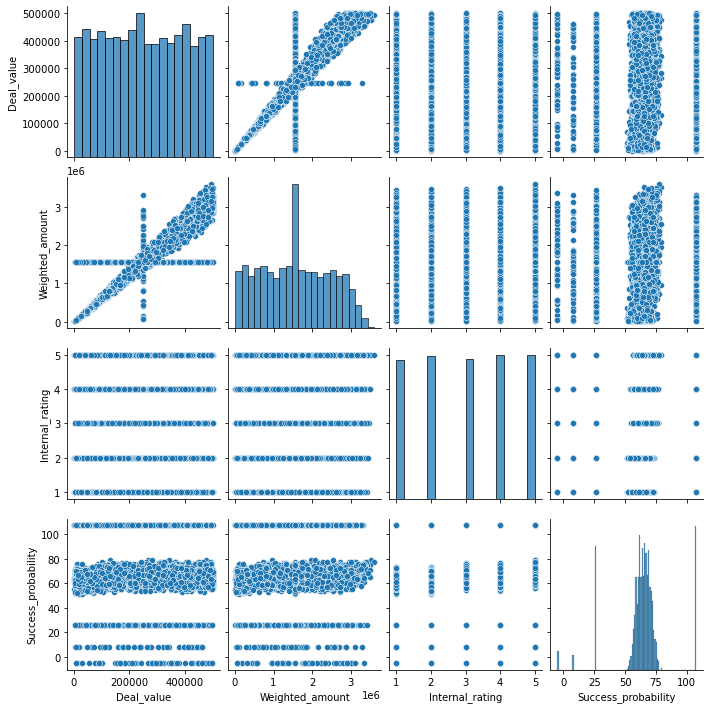

In [71]:
sns.pairplot(data=train_data1)

In [75]:
# Dataworking
X=train_data1.drop('Success_probability',axis=1)
y=train_data1['Success_probability']
print(X.shape,y.shape)

(5605, 9) (5605,)


In [78]:
X = pd.get_dummies(X,drop_first=True)

In [83]:
## Splitting Data in to Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4484, 19) (4484,) (1121, 19) (1121,)


In [84]:
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.transform(X_test)
X_test.head()

,Deal_value,Weighted_amount,Internal_rating,Pitch_Product_2,Lead_revenue_50 - 100 Million,Lead_revenue_500 Million - 1 Billion,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Level_of_meeting_Level 2,Level_of_meeting_Level 3,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
3732,-0.681890,-0.682774,-1.421181,-1.0,-0.695194,-0.710066,-0.581814,1.677178,-0.556742,-0.600708,-0.588339,-0.552617,-0.694488,1.429730,-0.434102,2.048372,-0.442418,-0.444938,-0.432286
2104,1.088135,0.916045,-1.421181,-1.0,1.438447,-0.710066,-0.581814,1.677178,-0.556742,1.664703,-0.588339,-0.552617,1.439909,-0.699433,-0.434102,-0.488193,-0.442418,2.247506,-0.432286
2815,0.707462,0.973429,1.411704,1.0,-0.695194,1.408320,-0.581814,-0.596240,-0.556742,1.664703,-0.588339,-0.552617,-0.694488,-0.699433,-0.434102,2.048372,-0.442418,-0.444938,-0.432286
5271,0.885076,0.744103,0.703483,-1.0,-0.695194,1.408320,-0.581814,1.677178,-0.556742,-0.600708,-0.588339,-0.552617,-0.694488,-0.699433,-0.434102,-0.488193,-0.442418,-0.444938,-0.432286
4439,-1.541476,-1.606867,-1.421181,-1.0,-0.695194,1.408320,-0.581814,1.677178,-0.556742,-0.600708,1.699702,-0.552617,-0.694488,-0.699433,2.303608,-0.488193,-0.442418,-0.444938,-0.432286


## Model 1 - Linear Regression

In [88]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_Train = LR.predict(X_train)
LR_Test = LR.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,LR_Train)))
print(np.sqrt(mean_squared_error(y_test,LR_Test)))

17.950827786233074
16.67234009168478


## Model 2 - Decision Tree Regressor

In [143]:
GSV1 =GridSearchCV(estimator=DecisionTreeRegressor(),cv=10,param_grid=dict(max_depth=[1,2,3,4,5,6,7,8,9,10,11])) 
GSV1.fit(X_train,y_train)
print(GSV1.best_params_)
DT = DecisionTreeRegressor(max_depth=1,random_state=42)
DT.fit(X_train,y_train)
DT_Train = DT.predict(X_train)
DT_Test = DT.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,DT_Train)))
print(np.sqrt(mean_squared_error(y_test,DT_Test)))

{'max_depth': 1}
18.10703490712685
16.79827246381234


## Model 3 - Random Forest Regressor

In [141]:
'''from sklearn.metrics import make_scorer,mean_squared_error
mse = make_scorer(mean_squared_error,greater_is_better=False)
GSV2 =GridSearchCV(estimator=RandomForestRegressor(),cv=10,param_grid=dict(n_estimators=np.arange(100,500,100)),scoring=mse) 
GSV2.fit(X_train,y_train)
print(GSV2.best_params_)'''
RF = RandomForestRegressor(n_estimators=309,random_state=42)
RF.fit(X_train,y_train)
RF_Train = RF.predict(X_train)
RF_Test = RF.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,RF_Train)))
print(np.sqrt(mean_squared_error(y_test,RF_Test)))

6.949220527886931
17.664487961196105


## Model 4 - Gradient Boosting Regressor

In [130]:
'''from sklearn.metrics import make_scorer,mean_squared_error
mse = make_scorer(mean_squared_error,greater_is_better=False)
GSV3 =GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict(n_estimators=np.arange(17,25,1)),scoring=mse) 
GSV3.fit(X_train,y_train)
print(GSV3.best_params_)'''
GB = GradientBoostingRegressor(n_estimators=19,random_state=42)
GB.fit(X_train,y_train)
GB_Train = GB.predict(X_train)
GB_Test = GB.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,GB_Train)))
print(np.sqrt(mean_squared_error(y_test,GB_Test)))

17.824383600056894
16.751575163400833


## Model 5 - Adaptive Boosting Regressor

In [144]:
'''GSV5 =GridSearchCV(estimator=AdaBoostRegressor(),cv=10,param_grid=dict(n_estimators=np.arange(1,10,1))) 
GSV5.fit(X_train,y_train)
print(GSV5.best_params_)'''
AB = AdaBoostRegressor(n_estimators=1,random_state=42)
AB.fit(X_train,y_train)
AB_Train = AB.predict(X_train)
AB_Test = AB.predict(X_test)
print(np.sqrt(mean_squared_error(y_train,AB_Train)))
print(np.sqrt(mean_squared_error(y_test,AB_Test)))

17.99477837467795
16.883669971567862


In [164]:
test_data1 = test_data.drop(TobeDropped_Cols,axis=1)

In [146]:
test_data1

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Lead_source,Level_of_meeting,Resource,Internal_rating
0,148175$,963137.5$,Product_1,500 Million - 1 Billion,Category 4,Contact Email,Level 2,Deliverable,3
1,273302$,1803793.2$,Product_1,50 - 100 Million,Category 1,Marketing Event,Level 3,Cannot deliver,1
2,185344$,1260339.2$,Product_2,50 - 100 Million,Category 1,Marketing Event,Level 3,Cannot deliver,3
3,189599$,1194473.7$,Product_1,500 Million - 1 Billion,Category 1,Others,Level 1,Not enough,3
4,379241$,2427142.4$,Product_1,50 - 100 Million,Category 1,Contact Email,Level 3,Yes,1
...,...,...,...,...,...,...,...,...,...
1397,17126$,105324.9$,Product_2,100 - 500 Million,Category 3,Marketing Event,Level 3,Yes,2
1398,371988$,2641114.8$,Product_1,100 - 500 Million,Category 1,Website,Level 3,We have all the requirements,5
1399,159358$,916308.5$,Product_1,50 - 100 Million,Category 2,Others,Level 2,Deliverable,3
1400,192001$,1276806.65$,Product_2,500 Million - 1 Billion,Category 4,Website,Level 2,We have all the requirements,4


In [165]:
test_data1['Deal_value']=test_data1['Deal_value'].str.replace("$","").astype(float)
test_data1['Weighted_amount']=test_data1['Weighted_amount'].str.replace("$","").astype(float)

In [166]:
Missingcolumns = test_data1[test_data1.columns[test_data1.isnull().sum()>0]].columns

In [167]:
Missingcolumns

Index(['Deal_value', 'Weighted_amount', 'Resource'], dtype='object')

In [168]:
test_data1['Deal_value'].fillna(test_data1['Deal_value'].median(),inplace=True)
test_data1['Weighted_amount'].fillna(test_data1['Weighted_amount'].median(),inplace=True)
test_data1['Resource'].fillna(test_data1['Resource'].mode()[0],inplace=True)

In [169]:
test_data1.isnull().sum().any()

False

In [170]:
test_data1=pd.get_dummies(test_data1,drop_first=True)

In [171]:
test_data1[test_data1.columns] = SS.fit_transform(test_data1)

In [172]:
pred_values_test = GSV3.predict(test_data1)

In [178]:
np.min(pred_values_test)

58.52105363858914

In [179]:
test_data.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating'],
      dtype='object')

In [180]:
finaop = pd.DataFrame(test_data['Deal_title'])

In [182]:
finaop['pred_values'] = pred_values_test

In [183]:
finaop.to_csv('submission.csv',header=False,index=False)